#1.understanding the problem statement
Employee attrition prediction refers to the process of forecasting whether an employee is likely to leave an organization (quit, retire, or be terminated) in the near future. This is important for businesses because high employee turnover can be costly and disruptive.

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier


In [ ]:
# Load your dataset (adjust path if necessary)
df = pd.read_csv('/content/employee_attrition_data.csv')

In [44]:
df.head()

,Age,Gender,Department,Job_Title,Years_at_Company,Satisfaction_Level,Average_Monthly_Hours,Promotion_Last_5Years,Salary,Attrition
0,27,1,3,4,9,0.586251,151,0,440,0
1,53,0,4,2,10,0.261161,221,1,707,0
2,59,0,3,1,8,0.304382,184,0,242,1
3,42,0,0,4,1,0.480779,242,0,161,0
4,44,0,4,2,10,0.636244,229,1,639,0


In [ ]:
cat_fatures = df.select_dtypes(include=['object']).columns
cat_fatures

Index(['Gender', 'Department', 'Job_Title'], dtype='object')

In [ ]:
# Step 1: Preprocessing
# Encode categorical columns using LabelEncoder
label_encoders = {}
for column in ['Gender', 'Department', 'Job_Title', 'Salary']:
    label_encoders[column] = LabelEncoder()
    df[column] = label_encoders[column].fit_transform(df[column])


In [ ]:
# Dropping the Employee_ID as it is not required
if 'Employee_ID' in df.columns:
    df = df.drop('Employee_ID', axis=1)

In [ ]:
#selecting numerical features
num_features = df.select_dtypes(include=['int64','float64']).columns
num_features

Index(['Age', 'Gender', 'Department', 'Job_Title', 'Years_at_Company',
       'Satisfaction_Level', 'Average_Monthly_Hours', 'Promotion_Last_5Years',
       'Salary', 'Attrition'],
      dtype='object')

In [ ]:
for feature in num_features:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
outliers = df[(df[feature] < lower_bound) | (df[feature] > upper_bound)]
if outliers.shape[0] > 0:
    print(f"Outliers in '{feature}':")
    print(outliers[feature])
print(f"Number of outliers in '{feature}':{outliers.shape[0]}")

Number of outliers in 'Attrition':0


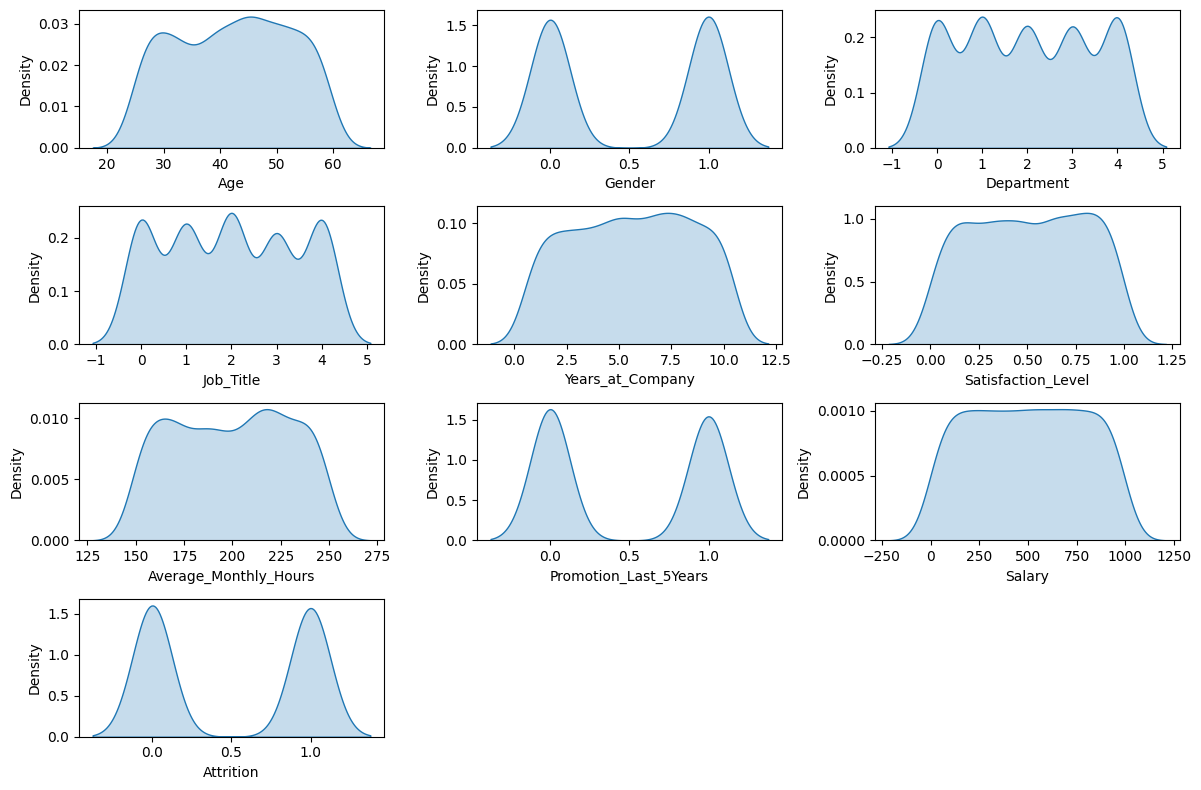

In [ ]:
#KDE plot for each numerical feature
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 8))


num_rows = 4
num_cols = 3

for i, feature in enumerate(num_features, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.kdeplot(data=df, x=feature, fill=True)
plt.tight_layout()
plt.show()

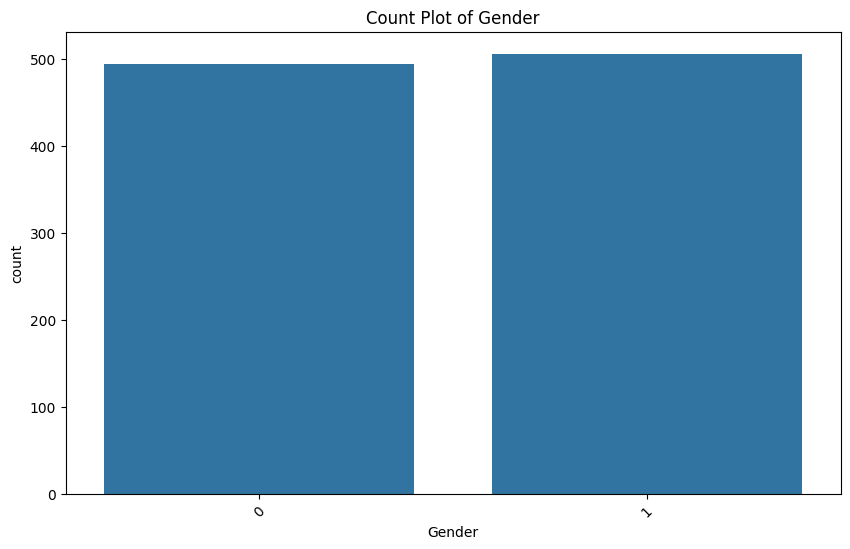

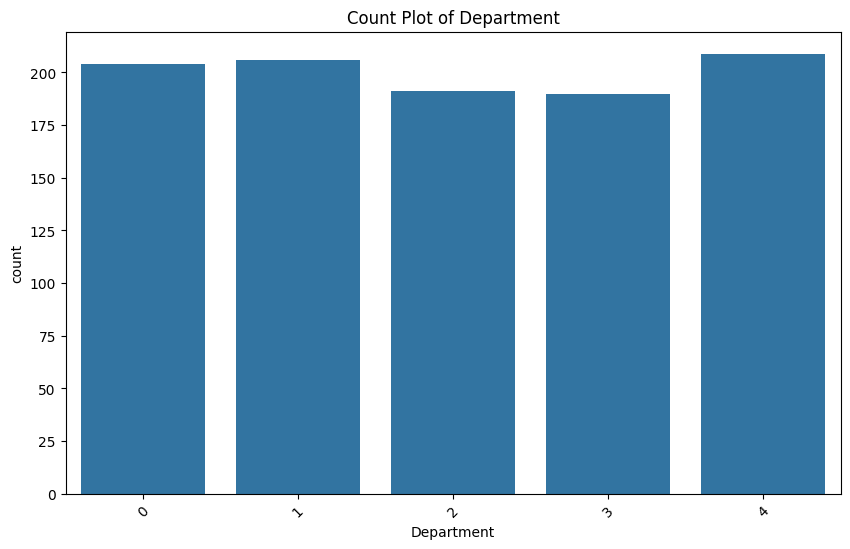

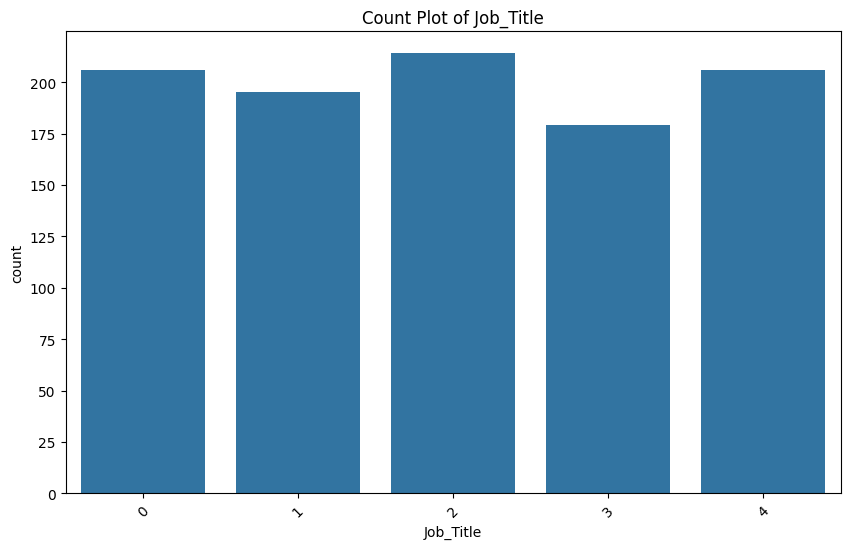

In [ ]:
for feature in cat_fatures:
    plt.figure(figsize=(10, 6))
    sns.countplot(data=df, x=feature)
    plt.title(f'Count Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()


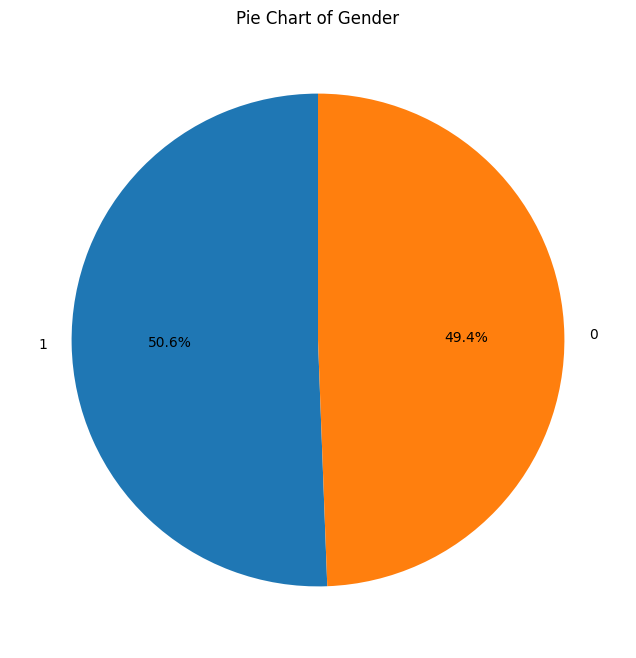

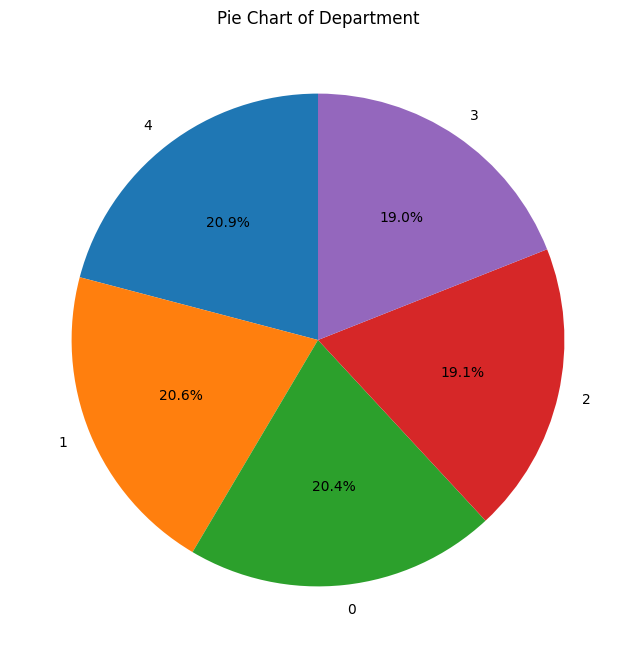

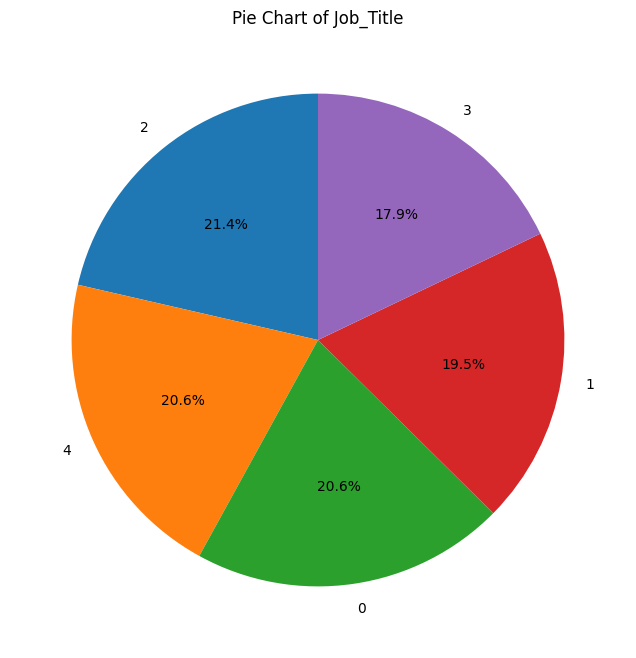

In [ ]:
#pie chart
for feature in cat_fatures:
    plt.figure(figsize=(8, 8))
    df[feature].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, figsize=(8, 8))
    plt.title(f'Pie Chart of {feature}')
    plt.ylabel('')
    plt.show()


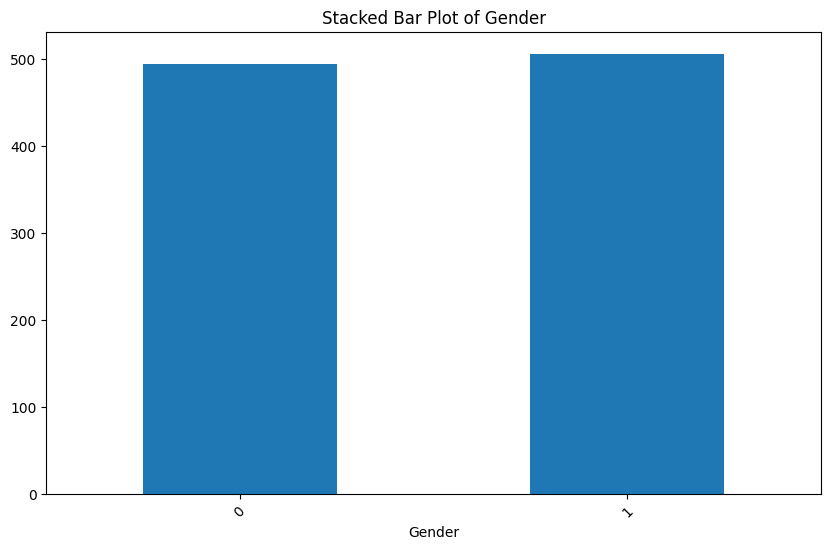

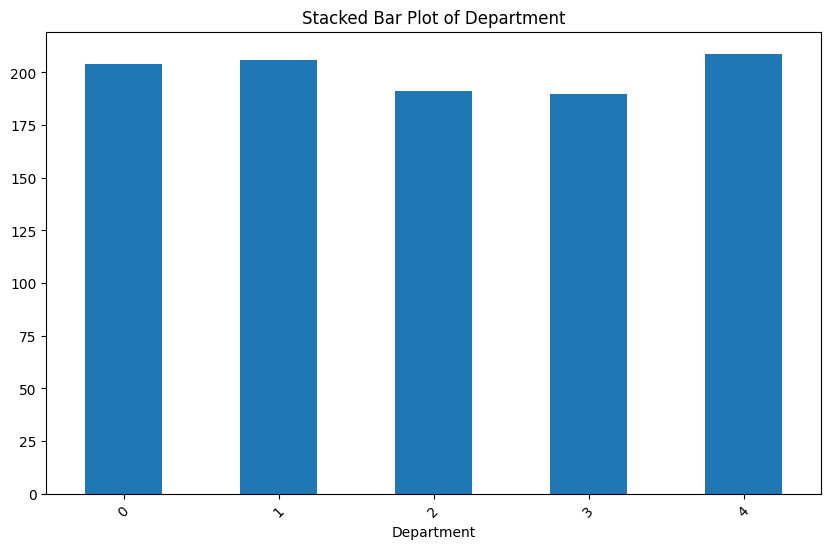

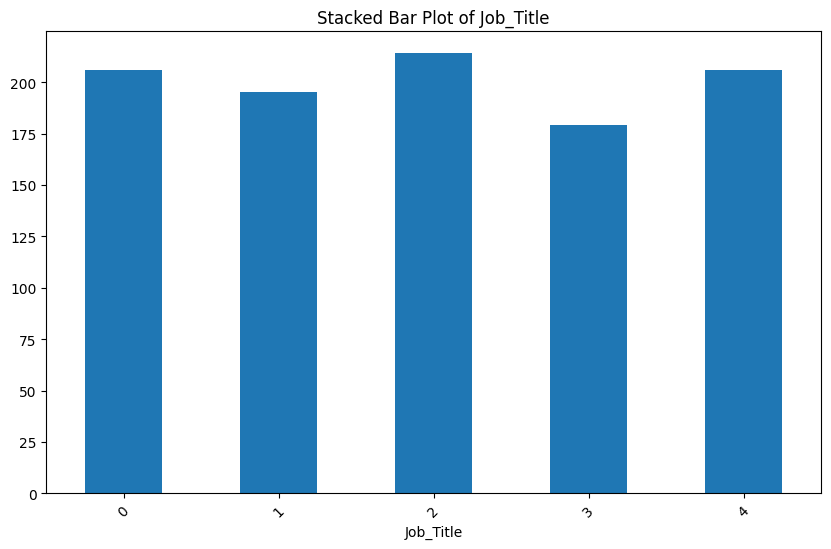

In [ ]:
for feature in cat_fatures:
    plt.figure(figsize=(10, 6))
    df[feature].value_counts().sort_index().plot(kind='bar', stacked=True)
    plt.title(f'Stacked Bar Plot of {feature}')
    plt.xticks(rotation=45)
    plt.show()


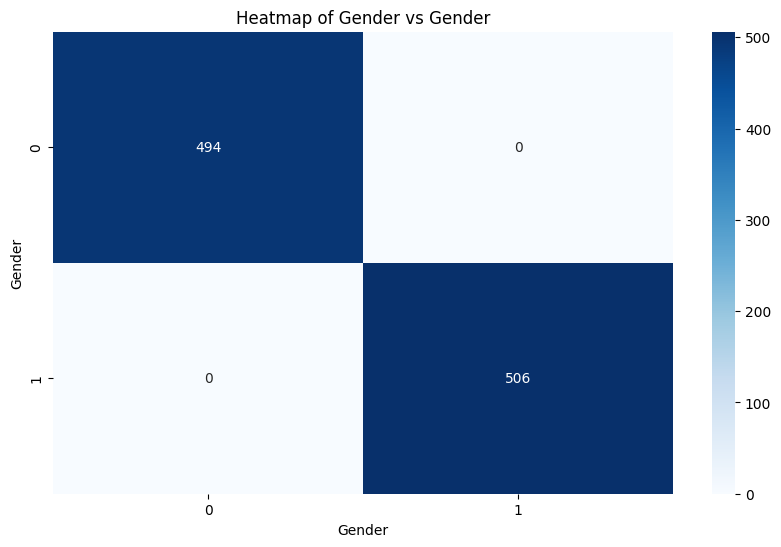

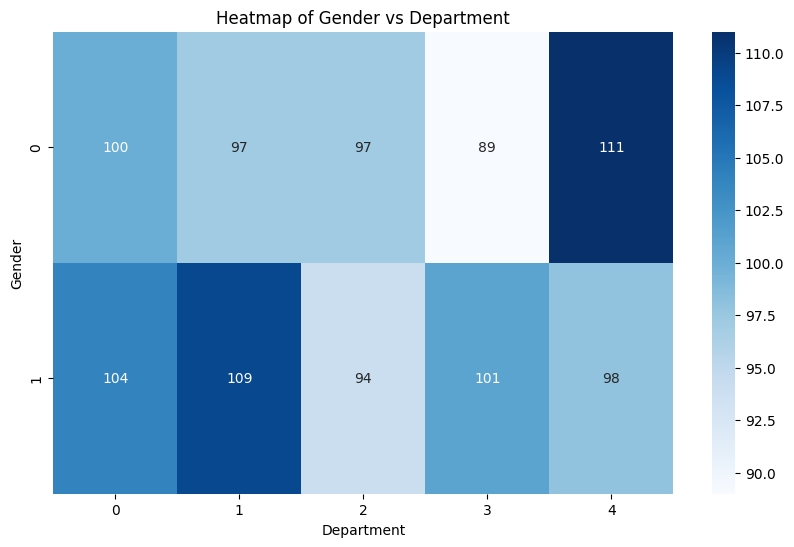

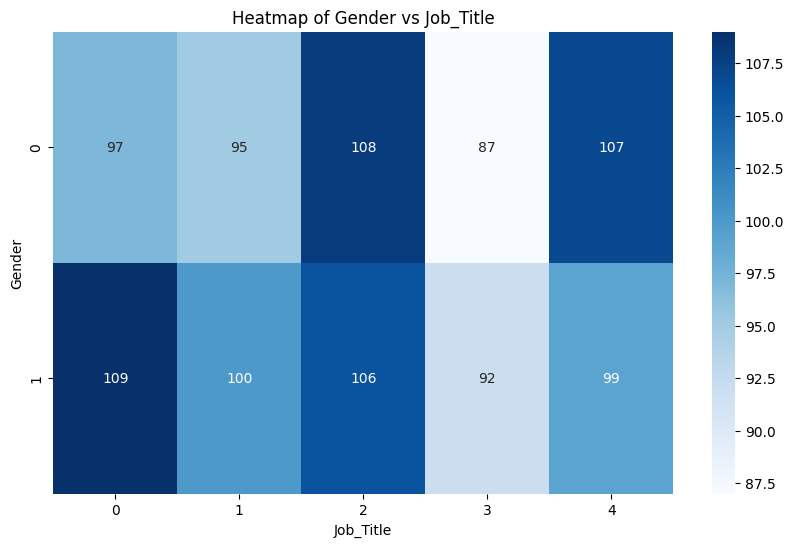

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Example categorical features you want to analyze (replace with your actual cat_features)
cat_features = ['Gender', 'Department', 'Job_Title']


for feature in cat_features:
    plt.figure(figsize=(10, 6))
    crosstab = pd.crosstab(df['Gender'], df[feature])
    sns.heatmap(crosstab, annot=True, cmap='Blues', fmt='d')
    plt.title(f'Heatmap of Gender vs {feature}')
    plt.show()


In [ ]:
# Split dataset into features (X) and target (y)
X = df.drop(columns=['Attrition'])
y = df['Attrition']


In [ ]:
# Step 2: Data Splitting
# Split data into train and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Step 3: Standardize the feature values
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [ ]:
# Step 4: Define the models to train
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),
    'Naive Bayes': GaussianNB(),
    'K-Nearest Neighbors': KNeighborsClassifier(),
    'XGBoost': XGBClassifier(use_label_encoder=False, eval_metric='logloss'),
    'Gradient Boosting': GradientBoostingClassifier()
}


In [ ]:
# Step 5: Train each model and evaluate
results = {}

for model_name, model in models.items():
    print(f"Training {model_name}...")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"{model_name} Accuracy: {accuracy:.2f}")
    print(f"Classification Report for {model_name}:\n")
    print(classification_report(y_test, y_pred))
    print("-" * 50)
    results[model_name] = accuracy

# Step 6: Print best model
best_model = max(results, key=results.get)
print(f"\nBest Model: {best_model} with Accuracy: {results[best_model]:.2f}")

Training Logistic Regression...
Logistic Regression Accuracy: 0.47
Classification Report for Logistic Regression:

              precision    recall  f1-score   support

           0       0.49      0.50      0.49       102
           1       0.46      0.45      0.46        98

    accuracy                           0.47       200
   macro avg       0.47      0.47      0.47       200
weighted avg       0.47      0.47      0.47       200

--------------------------------------------------
Training Decision Tree...
Decision Tree Accuracy: 0.48
Classification Report for Decision Tree:

              precision    recall  f1-score   support

           0       0.49      0.47      0.48       102
           1       0.48      0.50      0.49        98

    accuracy                           0.48       200
   macro avg       0.49      0.49      0.48       200
weighted avg       0.49      0.48      0.48       200

--------------------------------------------------
Training Random Forest...
Random

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [16:18:23] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost Accuracy: 0.49
Classification Report for XGBoost:

              precision    recall  f1-score   support

           0       0.51      0.49      0.50       102
           1       0.49      0.50      0.49        98

    accuracy                           0.49       200
   macro avg       0.50      0.50      0.49       200
weighted avg       0.50      0.49      0.50       200

--------------------------------------------------
Training Gradient Boosting...
Gradient Boosting Accuracy: 0.52
Classification Report for Gradient Boosting:

              precision    recall  f1-score   support

           0       0.53      0.51      0.52       102
           1       0.50      0.52      0.51        98

    accuracy                           0.52       200
   macro avg       0.52      0.52      0.51       200
weighted avg       0.52      0.52      0.52       200

--------------------------------------------------

Best Model: Gradient Boosting with Accuracy: 0.52


In [ ]:
# Step 7: Save the best model, scaler, and label encoders
best_model_classifier = models[best_model]

# Save the best model
with open('/content/best_model.pkl', 'wb') as model_file:
    pickle.dump(best_model_classifier, model_file)

# Save the scaler
with open('/content/scaler.pkl', 'wb') as scaler_file:
    pickle.dump(scaler, scaler_file)

# Save the label encoders
with open('/content/label_encoders.pkl', 'wb') as le_file:
    pickle.dump(label_encoders, le_file)

print("Models saved successfully.")

Models saved successfully.


In [ ]:
# Step 8: Predicting with the saved model
# Load the best model from the pickle file
with open('/content/best_model.pkl', 'rb') as model_file:
    loaded_best_model = pickle.load(model_file)

# Load the scaler from the pickle file
with open('/content/scaler.pkl', 'rb') as scaler_file:
    loaded_scaler = pickle.load(scaler_file)

# Load the label encoders from the pickle file
with open('/content/label_encoders.pkl', 'rb') as le_file:
    loaded_label_encoders = pickle.load(le_file)


In [ ]:

new_data = pd.DataFrame({
    "Age": [45],
    "Gender": [1],
    "Department": [2],
    "Job_Title": [1],
    "Years_at_Company": [10],
    "Satisfaction_Level": [0.85],
    "Salary": [2]
})

# Standardize new data using the loaded scaler
new_data_scaled = loaded_scaler.transform(new_data)

# Predict with the loaded best model
new_prediction = loaded_best_model.predict(new_data_scaled)
print(f"Prediction for new data (Attrition: 0 - No, 1 - Yes): {new_prediction[0]}")


Prediction for new data (Attrition: 0 - No, 1 - Yes): 1
